In [1]:
using SciMLBase
using OrdinaryDiffEq
using ForwardDiff
import ForwardDiff: jacobian

using StaticArrays
using LinearAlgebra
using Statistics

using JLD2
using Dates

using PyPlot

In [2]:
abstract type ODEType end
abstract type AbstractTask end

---
## Загрузка библиотек и модулей

---

In [3]:
include("Utils\\Anon_Utils.jl")
include("Utils\\CallBack_Utils.jl")
include("Utils\\Computation_Utils.jl")
include("Tasks\\ODE_Solving_Task.jl")
include("ODEs\\SL_ODE.jl")
include("Utils\\Visualization_Utils.jl")
include("Utils\\Period_Utils.jl")
include("Utils\\Session_Utils.jl")

---

## Система Стюарта-Ландау

---

In [44]:
r = 1.0
omega = 1.0
s = 1/4

SL = SL_ODE(r, omega, s)

time_span = 100.0
ic = [1.0, 0.0]

trans_time = 10.0
alg = Vern6()
callback = nothing
kwargs = Dict(:dtmax => 1e-2, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10)


ODESolve = ODESolve_Task(SL, time_span, ic; trans_time, alg, callback, kwargs)

[ODE::SL_ODE]: [r::Float64]: 1.0
[omega::Float64]: 1.0
[s::Float64]: 0.25

[time_span::Float64]: 100.0
[init_cond::Vector{Float64}]: [1.0, 0.0]
[trans_time::Float64]: 10.0
[alg::Vern6]: Vern6(true)
[callback::Nothing]: nothing
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :abstol => 1.0e-13, :dtmax => 0.01)
[solution::Nothing]: nothing


In [45]:
sol = ODESolve()

[t]: 10003-element Vector{Float64}
[y]: 2-element Vector{Vector{Float64}} with size 10003
[t_events]: 1-element Vector{Vector{Float64}} with size 0
[y_events]: 1-element Vector{Matrix{Float64}} with size 0x0
[retcode]: Success


In [6]:
using ChaosTools

In [60]:
using DynamicalSystems

LoadError: UndefVarError: CoupledODEs not defined

In [62]:
X

2-element SVector{2, Float64} with indices SOneTo(2):
 1.0
 0.0

In [66]:
SL_anon = (u, p, t) -> SL(zeros(2), u, p, t)

#47 (generic function with 1 method)

In [69]:
SL_ct = ODEProblem(SL, ic, (0.0, trans_time), [])
T, Δt = 100.0, 0.1
X, t = trajectory(SL_ct, T; Δt)
v = X[:, 1]

lines(t, v)

LoadError: MethodError: no method matching isdiscretetime(::ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Any}, ODEFunction{true, SciMLBase.AutoSpecialize, SL_ODE, UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem})
[0mClosest candidates are:
[0m  isdiscretetime([91m::ContinuousDynamicalSystem[39m) at C:\Users\artyo\.julia\packages\DynamicalSystemsBase\nNJRo\src\core\dynamicalsystem.jl:147
[0m  isdiscretetime([91m::DiscreteDynamicalSystem[39m) at C:\Users\artyo\.julia\packages\DynamicalSystemsBase\nNJRo\src\core\dynamicalsystem.jl:164
[0m  isdiscretetime([91m::DynamicalSystemsBase.MinimalDiscreteIntegrator[39m) at C:\Users\artyo\.julia\packages\DynamicalSystemsBase\nNJRo\src\core\discrete.jl:18
[0m  ...

In [48]:
period = estimate_period(sol.y[2], :zc, sol.t)

6.2833333333345305

In [8]:
2*pi

6.283185307179586

### Time series

In [46]:
title = "Stuart-Landau"
plotKwargs = Dict(:linewidth => 3)

TS_properties = Dict("title" => title, "kwargs" => plotKwargs)

Dict{String, Any} with 2 entries:
  "kwargs" => Dict(:linewidth=>3)
  "title"  => "Stuart-Landau"

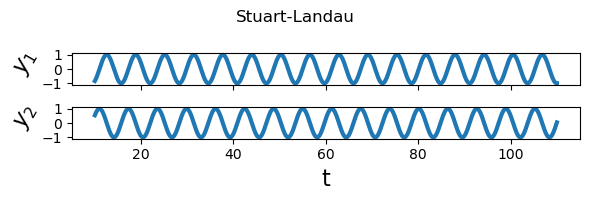

In [47]:
fig = plotTimeSeries(sol; plot_properties = TS_properties);

### Period

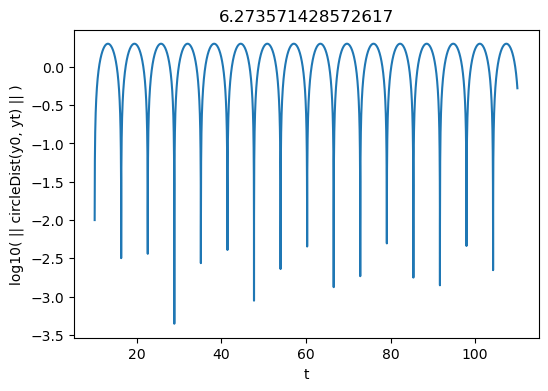

In [43]:
plotNorms(sol)

In [42]:
period = getPeriodTime(sol)

6.2482329902450084

### Tangent system

In [49]:
SL_tg = TangentODE(SL, 2)

time_span = period
u0 = [1.0, 0.0]
Q0 = [1.0 0.0; 0.0 1.0]

ODESolve = TanODESolve_Task(SL_tg, time_span, u0, Q0; alg, kwargs)

[ODE::TangentODE]: [ODE::SL_ODE]: [r::Float64]: 1.0
[omega::Float64]: 1.0
[s::Float64]: 0.25

[Jacobian::var"#8#10"{SL_ODE, Int64}]: #8
[ODEDim::Int64]: 2
[JacDim::Int64]: 2

[time_span::Float64]: 6.2833333333345305
[u0::Vector{Float64}]: [1.0, 0.0]
[Q0::Matrix{Float64}]: [1.0 0.0; 0.0 1.0]
[alg::Vern6]: Vern6(true)
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :abstol => 1.0e-13, :dtmax => 0.01)
[solution::Nothing]: nothing


In [50]:
tansol = ODESolve()

[t]: 632-element Vector{Float64}
[y]: 6-element Vector{Vector{Float64}} with size 632
[t_events]: 1-element Vector{Vector{Float64}} with size 0
[y_events]: 1-element Vector{Matrix{Float64}} with size 0x0
[retcode]: Success


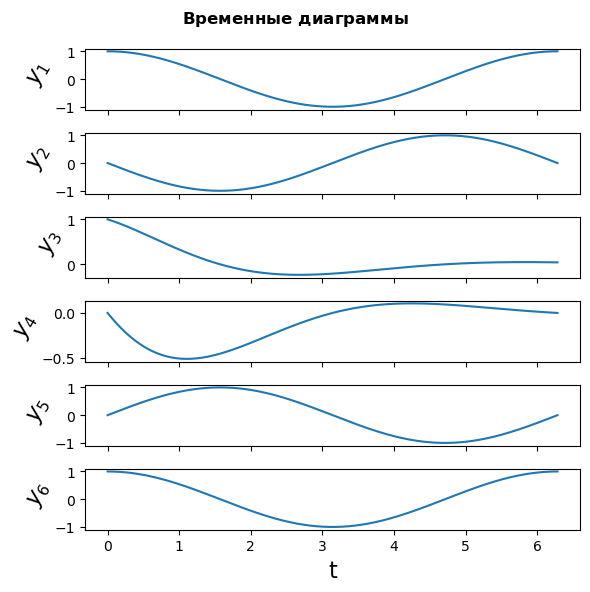

In [51]:
fig = plotTimeSeries(tansol);

In [52]:
W = [y[end] for y in tansol.y][3:6]

4-element Vector{Float64}:
  0.043210719513611225
 -6.3963168413278946e-6
  0.00014802615457888894
  0.999999989044261

In [53]:
reshape(W, (2, 2))

2×2 Matrix{Float64}:
  0.0432107   0.000148026
 -6.39632e-6  1.0